In [1]:
import numpy as np
import pandas as pd
import scipy as sc
import matplotlib.pyplot as plt
from matplotlib import gridspec

from lmfit import minimize, Parameters, Model, fit_report
from scipy import optimize

In [2]:
R_ch_data = pd.read_csv('R_ch_data.csv', sep='\t', decimal=',')
#оцифровка экспериментальных данных из статьи БОРЗОВ, ТОЛОКОННИКОВ, ЯДЕРНАЯ ФИЗИКА, 2020, том 83, 
#№ 6, с. 482–494, “САМОСОГЛАСОВАННЫЙ РАСЧЕТ ЗАРЯДОВЫХ РАДИУСОВ В ДЛИННОЙ ИЗОТОПИЧЕСКОЙ ЦЕПОЧКЕ 58−82 Cu”
R_ch_data.head()

,N,R_ch_exp,N_line,R_ch_line
0,28.933333,3.795238,28.819385,3.753810
1,30.011230,3.819524,30.556438,3.790000
2,30.940200,3.835238,36.606438,3.914286
3,31.958369,3.857143,38.792990,3.958095
4,32.948784,3.863810,41.758727,4.014762


In [3]:
R_ch_data['N'] = np.round(R_ch_data['N'])
R_ch_data.head()

,N,R_ch_exp,N_line,R_ch_line
0,29.0,3.795238,28.819385,3.753810
1,30.0,3.819524,30.556438,3.790000
2,31.0,3.835238,36.606438,3.914286
3,32.0,3.857143,38.792990,3.958095
4,33.0,3.863810,41.758727,4.014762


In [4]:
Z = 29
N = np.arange(2,951)
A = N + Z
r_0 = 1.0
r_1 = 1.2
r_2 = 1.5
R = r_0 * (A**(1/3))
R_1 = r_1 * (A**(1/3))
R_2 = r_2 * (A**(1/3))

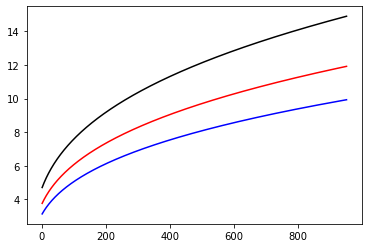

In [5]:
plt.plot(N, R, color='blue')
plt.plot(N, R_1, color='red')
plt.plot(N, R_2, color='black')

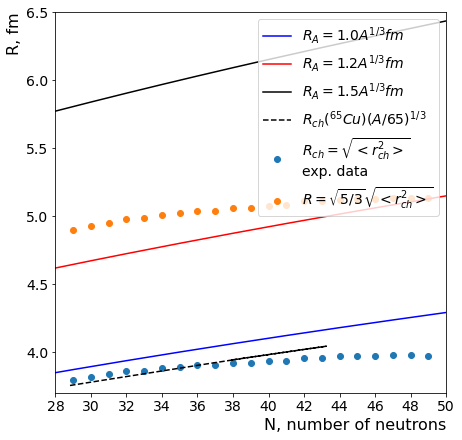

In [6]:
plt.figure(figsize=(7,7))
plt.plot(N, R, color='blue', label='$R_A=1.0A^{1/3}fm$')
#plt.plot(N, ((A/65)**(1/3)), color='green', )
plt.plot(N, R_1, color='red', label='$R_A=1.2A^{1/3}fm$')
plt.plot(N, R_2, color='black', label='$R_A=1.5A^{1/3}fm$')
plt.scatter(R_ch_data['N'].values, R_ch_data['R_ch_exp'].values, label='$R_{ch}=\sqrt{<r_{ch}^{2}>}$ \nexp. data')
plt.scatter(R_ch_data['N'].values, R_ch_data['R_ch_exp'].values*np.sqrt(5/3), label='$R=\sqrt{5/3}\sqrt{<r_{ch}^{2}>}$')
plt.plot(R_ch_data['N_line'].values, R_ch_data['R_ch_line'].values, c='k', ls='--', label='$R_{ch}(^{65}Cu)(A/65)^{1/3}$')
plt.xlim(28,50)
plt.ylim(3.7,6.5)
plt.xticks(np.arange(28,52,2), fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('N, number of neutrons', loc='right', fontsize=16)
plt.ylabel('R, fm', loc='top', fontsize=16)
plt.legend(fontsize=14, loc='upper right')

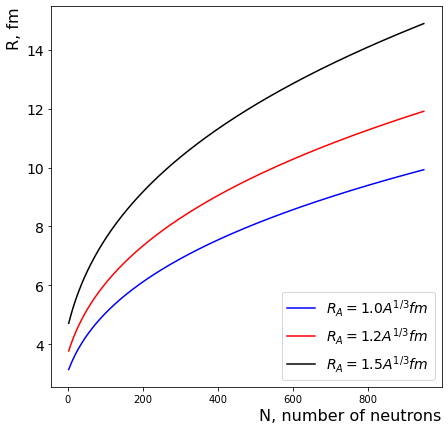

In [7]:
plt.figure(figsize=(7,7))
plt.plot(N, R, color='blue', label='$R_A=1.0A^{1/3}fm$')
#plt.plot(N, ((A/65)**(1/3)), color='green', )
plt.plot(N, R_1, color='red', label='$R_A=1.2A^{1/3}fm$')
plt.plot(N, R_2, color='black', label='$R_A=1.5A^{1/3}fm$')
#plt.scatter(R_ch_data['N'].values, R_ch_data['R_ch_exp'].values, label='Exp. data article')
#plt.plot(R_ch_data['N_line'].values, R_ch_data['R_ch_line'].values, c='k', ls='--', label='Line data article')
#plt.xlim(28,50)
#plt.ylim(3.7,4)
#plt.xticks(np.arange(28,52,2), fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('N, number of neutrons', loc='right', fontsize=16)
plt.ylabel('R, fm', loc='top', fontsize=16)
plt.legend(fontsize=14, loc='lower right')

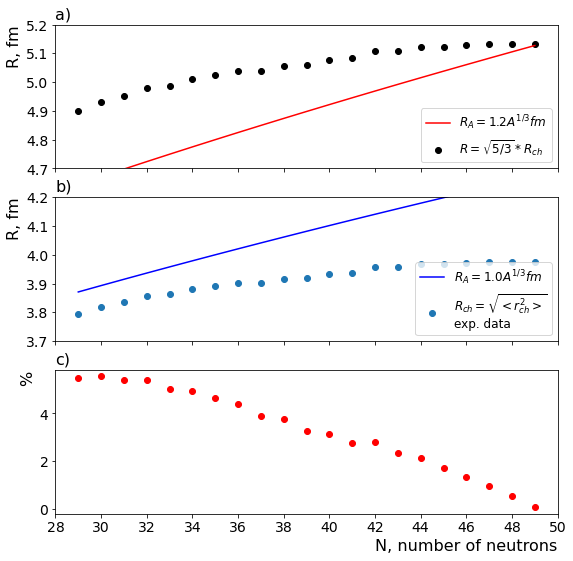

In [8]:
cbrtA = (R_ch_data['N'].values + Z)**(1/3)
N_Cu = R_ch_data['N'].values


fig = plt.figure(figsize=(9,9))
# set height ratios for sublots
gs = gridspec.GridSpec(3, 1) 

# the fisrt subplot
ax0 = plt.subplot(gs[0])
#ax0.plot(N, r_0*cbrtA, color='blue', label='$R_A=1.0A^{1/3}fm$')
ax0.plot(N_Cu, r_1*cbrtA, color='red', label='$R_A=1.2A^{1/3}fm$')
#ax0.plot(N, r_2*cbrtA, color='black', label='$R_A=1.5A^{1/3}fm$')
#ax0.scatter(N, R_ch_data['R_ch_exp'].values, label='$R_{ch}=\sqrt{<r_{ch}^{2}>}$ \nexp. data')
ax0.scatter(N_Cu, R_ch_data['R_ch_exp'].values*(5/3)**0.5, label='$R=\sqrt{5/3}*R_{ch}$', c='k')
#ax0.plot(R_ch_data['N_line'].values, R_ch_data['R_ch_line'].values, c='k', ls='--', label='$R_{ch}(^{65}Cu)(A/65)^{1/3}$')

ax0.set_ylabel('R, fm', loc='top', fontsize=16)
ax0.tick_params(axis='both', which='major', labelsize=14)
ax0.tick_params(axis='both', which='minor', labelsize=14)
ax0.set_ylim(4.7, 5.2)
ax0.set_title('a)', loc='left', fontsize=16)

# the second subplot
ax1 = plt.subplot(gs[1])
ax1.plot(N_Cu, r_0*cbrtA, color='blue', label='$R_A=1.0A^{1/3}fm$')
#ax0.plot(N, r_1*cbrtA, color='red', label='$R_A=1.2A^{1/3}fm$')
#ax0.plot(N, r_2*cbrtA, color='black', label='$R_A=1.5A^{1/3}fm$')
ax1.scatter(N_Cu, R_ch_data['R_ch_exp'].values, label='$R_{ch}=\sqrt{<r_{ch}^{2}>}$ \nexp. data')
#ax0.scatter(N, R_ch_data['R_ch_exp'].values*(5/3)**0.5, label='$R=\sqrt{5/3}\sqrt{<r_{ch}^{2}>}$')
#ax0.plot(R_ch_data['N_line'].values, R_ch_data['R_ch_line'].values, c='k', ls='--', label='$R_{ch}(^{65}Cu)(A/65)^{1/3}$')

#ax0.set_ylabel('R, fm', loc='top', fontsize=16)
ax1.tick_params(axis='both', which='major', labelsize=14)
ax1.tick_params(axis='both', which='minor', labelsize=14)
ax1.set_ylim(3.7, 4.2)
ax1.set_ylabel('R, fm', loc='top', fontsize=16)
ax1.set_title('b)', loc='left', fontsize=16)

#the third subplot
# shared axis X
percent_diff = ((R_ch_data['R_ch_exp'].values*(5/3)**0.5) - (r_1*cbrtA)) / (r_1*cbrtA)
percent_diff = percent_diff*100
ax2 = plt.subplot(gs[2], sharex = ax0)
#ax1.scatter(N, (R_ch_data['R_ch_exp'].values*(5/3)**0.5) / (r_0*cbrtA), c = 'blue', 
#         label=r'$\frac{R=\sqrt{5/3}\sqrt{<r_{ch}^{2}>}}{R_A=1.0A^{1/3}}$')
ax2.scatter(N_Cu, percent_diff, c = 'red',)
#ax2.scatter(N, (R_ch_data['R_ch_exp'].values*(5/3)**0.5) / (r_2*cbrtA), c = 'k', 
#         label=r'$\frac{R=\sqrt{5/3}\sqrt{<r_{ch}^{2}>}}{R_A=1.5A^{1/3}}$')
ax2.tick_params(axis='both', which='major', labelsize=14)
ax2.tick_params(axis='both', which='minor', labelsize=14)
ax2.set_xlabel('N, number of neutrons', loc='right', fontsize=16)
ax2.set_ylabel("$\%$", loc='top', fontsize=16)
ax2.set_title('c)', loc='left', fontsize=16)
#ax1.set_xlim(10,10000)
#ax1.set_ylim(0.6,1.25)
plt.setp(ax0.get_xticklabels(), visible=False)
plt.setp(ax1.get_xticklabels(), visible=False)
# remove last tick label for the second subplot
#yticks = ax1.yaxis.get_major_ticks()
#yticks[-1].label1.set_visible(False)

# put lened on first subploсt
#ax0.legend((line0, line1), ('red line', 'blue line'), loc='lower left')
ax0.legend(fontsize=12, loc='lower right',)
ax1.legend(loc='lower right', fontsize=12,)
#ax2.legend(loc='upper right', fontsize=16,)
ax1.tick_params(axis='both', which='major', labelsize=14)
ax1.tick_params(axis='both', which='minor', labelsize=14)
ax0.set_xticks(np.arange(28,52,2))
ax1.set_xticks(np.arange(28,52,2))

#ax0.text( 5, 5, 'a)', fontsize=16,)
#ax1.text( 5, 0.7, 'b)', fontsize=16,)
#ax1.text(-30, -1, 'b)', fontsize=16)

#ax0.set_xlim(0,10^4)
#ax1.set_xlim(0,10^4)

# remove vertical gap between subplots
#plt.subplots_adjust(hspace=.0)
#plt.savefig("nuclear_radius_comparison.png", format='png', bbox_inches="tight", transparent=False, dpi=500)

In [9]:
def radius_line(x, r0, Z):
    A = x + Z
    return r0*(A**(1/3))

In [10]:
Cu_model = Model(radius_line)

Cu_model.set_param_hint('Z', value=29, vary=False)
Cu_model.set_param_hint('r0', value=1.2, min=0.1, max=3)

Cu_pars = Cu_model.make_params()
Cu_result = Cu_model.fit(R_ch_data['R_ch_exp'].values*np.sqrt(5/3), Cu_pars, x=R_ch_data['N'].values,)
print(fit_report(Cu_result))

[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 6
    # data points      = 21
    # variables        = 1
    chi-square         = 0.14662405
    reduced chi-square = 0.00733120
    Akaike info crit   = -102.252524
    Bayesian info crit = -101.208001
[[Variables]]
    r0:  1.23862652 +/- 0.00457967 (0.37%) (init = 1.2)
    Z:   29 (fixed)


In [11]:
Cu_model_exp = Model(radius_line)

Cu_model_exp.set_param_hint('Z', value=29, vary=False)
Cu_model_exp.set_param_hint('r0', value=1.2, min=0.1, max=3)

Cu_pars_exp = Cu_model_exp.make_params()
Cu_result_exp = Cu_model_exp.fit(R_ch_data['R_ch_exp'].values, Cu_pars_exp, x=R_ch_data['N'].values, )
print(fit_report(Cu_result_exp))

[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 8
    # data points      = 21
    # variables        = 1
    chi-square         = 0.08797443
    reduced chi-square = 0.00439872
    Akaike info crit   = -112.979862
    Bayesian info crit = -111.935339
[[Variables]]
    r0:  0.95943597 +/- 0.00354739 (0.37%) (init = 1.2)
    Z:   29 (fixed)


In [12]:
Cu_result_comps = Cu_result.eval_components()

In [13]:
Cu_result_comps

{'radius_line': array([4.79457045, 4.82196859, 4.84905887, 4.8758498 , 4.9023495 ,
        4.92856577, 4.95450607, 4.98017755, 5.00558705, 5.03074118,
        5.05564625, 5.08030833, 5.10473326, 5.12892667, 5.15289397,
        5.17664036, 5.20017086, 5.22349033, 5.24660342, 5.26951464,
        5.29222834])}

In [14]:
Cu_result.best_values

{'r0': 1.2386265178233953, 'Z': 29}

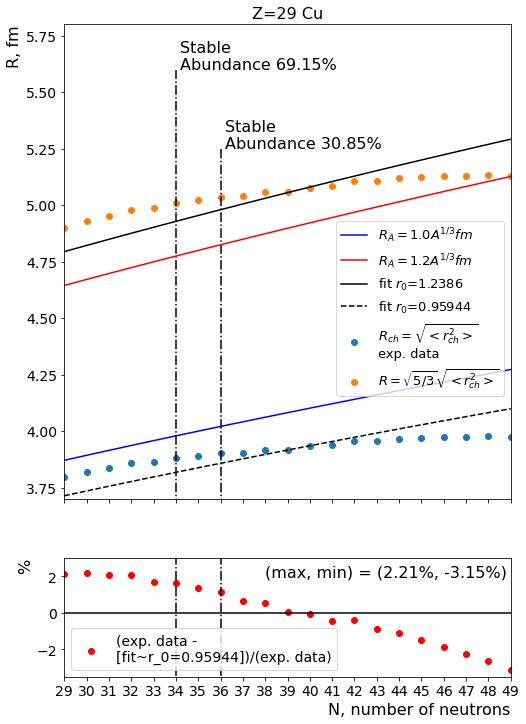

In [32]:
Cu_result_comps = Cu_result.eval_components()
Cu_result_exp_comps = Cu_result_exp.eval_components()

percent_diff_Cu = (R_ch_data['R_ch_exp'].values - Cu_result_exp_comps['radius_line']) / R_ch_data['R_ch_exp'].values
percent_diff_Cu = percent_diff_Cu*100

fig = plt.figure(figsize=(8,12))
# set height ratios for sublots
gs = gridspec.GridSpec(2, 1, height_ratios=[4, 1]) 

# the fisrt subplot
ax0 = plt.subplot(gs[0])
ax0.plot(N, R, color='blue', label='$R_A=1.0A^{1/3}fm$')
#plt.plot(N, ((A/65)**(1/3)), color='green', )
ax0.plot(N, R_1, color='red', label='$R_A=1.2A^{1/3}fm$')
#plt.plot(N, R_2, color='black', label='$R_A=1.5A^{1/3}fm$')
ax0.scatter(R_ch_data['N'].values, R_ch_data['R_ch_exp'].values, label='$R_{ch}=\sqrt{<r_{ch}^{2}>}$ \nexp. data')
ax0.scatter(R_ch_data['N'].values, R_ch_data['R_ch_exp'].values*np.sqrt(5/3), label='$R=\sqrt{5/3}\sqrt{<r_{ch}^{2}>}$')
ax0.plot(R_ch_data['N'].values, Cu_result_comps['radius_line'], 'k', ls='-', label='fit $r_0$={:.5}'.format(Cu_result.best_values['r0']))
ax0.plot(R_ch_data['N'].values, Cu_result_exp_comps['radius_line'], 'k', ls='--', label='fit $r_0$={:.5}'.format(Cu_result_exp.best_values['r0']))

ax0.vlines(x=34, ymin=0, ymax=5.6, color='k', ls='-.')
ax0.text(x=34.2, y=5.6, s='Stable \nAbundance 69.15%', fontsize=16)
ax0.vlines(x=36, ymin=0, ymax=5.25, color='k', ls='-.')
ax0.text(x=36.2, y=5.25, s='Stable \nAbundance 30.85%', fontsize=16)

ax0.set_xlim(29,49)
ax0.set_ylim(3.7,5.8)
ax0.set_xticks(np.arange(29,50,1),)
#plt.yticks(fontsize=14)
ax0.set_ylabel('R, fm', loc='top', fontsize=16)
ax0.set_title('Z=29 Cu', fontsize=16)
ax0.legend(fontsize=13, loc='upper right', bbox_to_anchor=(1., 0.6))

ax0.tick_params(axis='both', which='major', labelsize=14)
ax0.tick_params(axis='both', which='minor', labelsize=14)

ax1 = plt.subplot(gs[1], sharex = ax0)
label_ax1 = '(exp. data -'+'\n[fit~r_0={:.5}])/(exp. data)'.format(Cu_result_exp.best_values['r0'])
ax1.scatter(R_ch_data['N'].values, percent_diff_Cu, c = 'red', label = label_ax1)
ax1.tick_params(axis='both', which='major', labelsize=14)
ax1.tick_params(axis='both', which='minor', labelsize=14)
ax1.set_xlabel('N, number of neutrons', loc='right', fontsize=16)
ax1.vlines(x=34, ymin=-20, ymax=20, color='k', ls='-.')
ax1.vlines(x=36, ymin=-20, ymax=20, color='k', ls='-.')
ax1.set_ylim(-3.5,3)
ax1.set_ylabel('%', loc='top', fontsize=16)
ax1.text(x=38, y=2, s='(max, min) = ({:.3}%, {:.3}%)'.format(percent_diff_Cu.max(), percent_diff_Cu.min()), fontsize=16)
ax1.legend(fontsize=14, loc='lower left')
#ax1.legend(fontsize=14, loc='upper right', bbox_to_anchor=(1.64, 1.0))
ax1.hlines(0, 0, 100, color='k')
plt.setp(ax0.get_xticklabels(), visible=False)
#fig.savefig('radius_Z=29_Cu.png', bbox_inches="tight", format='png', dpi=500)
plt.show()

In [33]:
percent_diff_Cu.min()

-3.146646695670907

In [34]:
R_ch_data_K = pd.read_csv('R_ch_data_K.csv', sep='\t', decimal=',')
#оцифровка экспериментальных данных из статьи https://doi.org/10.1038/s41567-020-01136-5 
#Charge radii of exotic potassium isotopes challenge nuclear theory and the magic character of N = 32
R_ch_data_K['N'] = np.round(R_ch_data_K['N'])
R_ch_data_K.head()

,N,R_ch_exp
0,17.0,3.405349
1,18.0,3.418837
2,19.0,3.424419
3,20.0,3.435581
4,21.0,3.437907


In [35]:
K_model_exp = Model(radius_line)

K_model_exp.set_param_hint('Z', value=19, vary=False)
K_model_exp.set_param_hint('r0', value=1.2, min=0.1, max=3)

K_pars_exp = K_model_exp.make_params()
K_result_exp = K_model_exp.fit(R_ch_data_K['R_ch_exp'].values, K_pars_exp, x=R_ch_data_K['N'].values,)
print(fit_report(K_result_exp))

[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 7
    # data points      = 17
    # variables        = 1
    chi-square         = 0.14972238
    reduced chi-square = 0.00935765
    Akaike info crit   = -78.4471594
    Bayesian info crit = -77.6139461
[[Variables]]
    r0:  0.98202659 +/- 0.00665031 (0.68%) (init = 1.2)
    Z:   19 (fixed)


In [36]:
K_model = Model(radius_line)

K_model.set_param_hint('Z', value=19, vary=False)
K_model.set_param_hint('r0', value=1.2, min=0.1, max=3)

K_pars = K_model.make_params()
K_result = K_model.fit(R_ch_data_K['R_ch_exp'].values*np.sqrt(5/3), K_pars, x=R_ch_data_K['N'].values,)
print(fit_report(K_result))

[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 7
    # data points      = 17
    # variables        = 1
    chi-square         = 0.24953730
    reduced chi-square = 0.01559608
    Akaike info crit   = -69.7631238
    Bayesian info crit = -68.9299105
[[Variables]]
    r0:  1.26779087 +/- 0.00858552 (0.68%) (init = 1.2)
    Z:   19 (fixed)


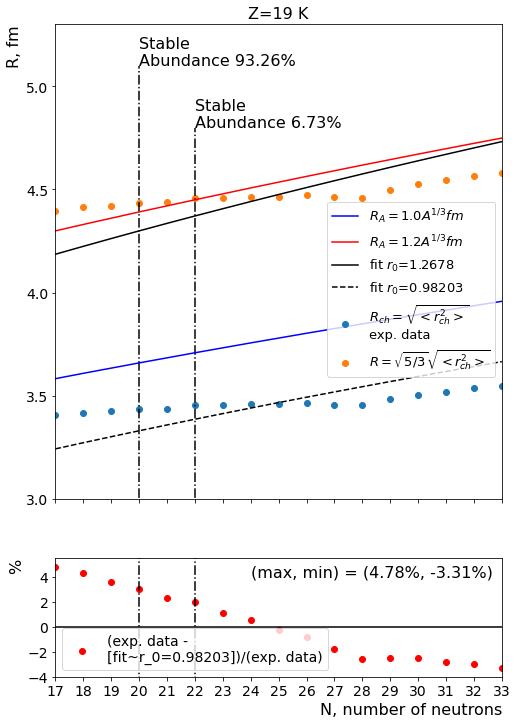

In [44]:
K_result_comps = K_result.eval_components()
K_result_exp_comps = K_result_exp.eval_components()

#plt.figure(figsize=(7,7))
#plt.plot(N, R, color='blue', label='$R_A=1.0A^{1/3}fm$')
#plt.plot(N, ((A/65)**(1/3)), color='green', )
#plt.plot(N, R_1, color='red', label='$R_A=1.2A^{1/3}fm$')
#plt.plot(N, R_2, color='black', label='$R_A=1.5A^{1/3}fm$')
#plt.scatter(R_ch_data_K['N'].values, R_ch_data_K['R_ch_exp'].values, label='$R_{ch}=\sqrt{<r_{ch}^{2}>}$ \nexp. data')
#plt.scatter(R_ch_data_K['N'].values, R_ch_data_K['R_ch_exp'].values*np.sqrt(5/3), label='$R=\sqrt{5/3}\sqrt{<r_{ch}^{2}>}$')
#plt.plot(R_ch_data_K['N'].values, K_result_comps['radius_line'], 'k', ls='-', label='fit $r_0$={:.5}'.format(K_result.best_values['r0']))
#plt.plot(R_ch_data_K['N'].values, K_result_exp_comps['radius_line'], 'k', ls='--', label='fit $r_0$={:.5}'.format(K_result_exp.best_values['r0']))
#plt.xlim(R_ch_data_K['N'].values[0],R_ch_data_K['N'].values[-1])
#plt.ylim(3,5)
#plt.xticks(np.arange(28,52,2), fontsize=14)
#plt.yticks(fontsize=14)
#plt.xlabel('N, number of neutrons', loc='right', fontsize=16)
#plt.ylabel('R, fm', loc='top', fontsize=16)
#plt.title('Z=19 K', fontsize=16)
#plt.legend(fontsize=14, loc='upper right', bbox_to_anchor=(1.5, 1.0))


percent_diff_K = (R_ch_data_K['R_ch_exp'].values - K_result_exp_comps['radius_line']) / R_ch_data_K['R_ch_exp'].values
percent_diff_K = percent_diff_K*100

fig = plt.figure(figsize=(8,12))
# set height ratios for sublots
gs = gridspec.GridSpec(2, 1, height_ratios=[4, 1]) 

# the fisrt subplot
ax0 = plt.subplot(gs[0])
ax0.plot(N, R, color='blue', label='$R_A=1.0A^{1/3}fm$')
#plt.plot(N, ((A/65)**(1/3)), color='green', )
ax0.plot(N, R_1, color='red', label='$R_A=1.2A^{1/3}fm$')
#plt.plot(N, R_2, color='black', label='$R_A=1.5A^{1/3}fm$')
ax0.scatter(R_ch_data_K['N'].values, R_ch_data_K['R_ch_exp'].values, label='$R_{ch}=\sqrt{<r_{ch}^{2}>}$ \nexp. data')
ax0.scatter(R_ch_data_K['N'].values, R_ch_data_K['R_ch_exp'].values*np.sqrt(5/3), label='$R=\sqrt{5/3}\sqrt{<r_{ch}^{2}>}$')
ax0.plot(R_ch_data_K['N'].values, K_result_comps['radius_line'], 'k', ls='-', label='fit $r_0$={:.5}'.format(K_result.best_values['r0']))
ax0.plot(R_ch_data_K['N'].values, K_result_exp_comps['radius_line'], 'k', ls='--', label='fit $r_0$={:.5}'.format(K_result_exp.best_values['r0']))

ax0.vlines(x=20, ymin=0, ymax=5.1, color='k', ls='-.')
ax0.text(x=20, y=5.1, s='Stable \nAbundance 93.26%', fontsize=16)
ax0.vlines(x=22, ymin=0, ymax=4.8, color='k', ls='-.')
ax0.text(x=22, y=4.8, s='Stable \nAbundance 6.73%', fontsize=16)

ax0.set_xlim(R_ch_data_K['N'].values.min(), R_ch_data_K['N'].values.max())
ax0.set_ylim(3,5.3)
ax0.set_xticks(np.arange(R_ch_data_K['N'].values.min(), R_ch_data_K['N'].values.max()+1,1),)
#plt.yticks(fontsize=14)
ax0.set_ylabel('R, fm', loc='top', fontsize=16)
ax0.set_title('Z=19 K', fontsize=16)
ax0.legend(fontsize=13, loc='upper right', bbox_to_anchor=(1., 0.64))

ax0.tick_params(axis='both', which='major', labelsize=14)
ax0.tick_params(axis='both', which='minor', labelsize=14)

ax1 = plt.subplot(gs[1], sharex = ax0)
label_ax1 = '(exp. data -\n[fit~r_0={:.5}])/(exp. data)'.format(K_result_exp.best_values['r0'])
ax1.scatter(R_ch_data_K['N'].values, percent_diff_K, c = 'red', label = label_ax1)
ax1.tick_params(axis='both', which='major', labelsize=14)
ax1.tick_params(axis='both', which='minor', labelsize=14)
ax1.set_xlabel('N, number of neutrons', loc='right', fontsize=16)
ax1.vlines(x=20, ymin=-20, ymax=20, color='k', ls='-.')
ax1.vlines(x=22, ymin=-20, ymax=20, color='k', ls='-.')
ax1.hlines(0, 0, 100, color='k')
ax1.set_ylim(-4, 5.5)
ax1.set_yticks(np.arange(-4,5,2))
ax1.set_ylabel('%', loc='top', fontsize=16)
ax1.text(x=24, y=4, s='(max, min) = ({:.3}%, {:.3}%)'.format(percent_diff_K.max(), percent_diff_K.min()), fontsize=16)
ax1.legend(fontsize=14, loc='lower left')
#ax1.legend(fontsize=14, loc='upper right', bbox_to_anchor=(1.8, 1.0))

plt.setp(ax0.get_xticklabels(), visible=False)
#fig.savefig('radius_Z=19_K.png', bbox_inches="tight", format='png', dpi=500)
plt.show()

In [66]:
R_ch_data_Sn = pd.read_csv('R_ch_data_Sn.csv', sep='\t', decimal=',')
#оцифровка экспериментальных данных из статьи https://journals.aps.org/prl/pdf/10.1103/PhysRevLett.122.192502 
#Laser Spectroscopy of Neutron-Rich Tin Isotopes:A Discontinuity in Charge Radii across the N= 82 Shell Closure
R_ch_data_Sn['N'] = np.round(R_ch_data_Sn['N'])
R_ch_data_Sn.head()

,N,R_ch_exp
0,58.0,4.557544
1,60.0,4.577853
2,62.0,4.594778
3,64.0,4.609284
4,66.0,4.625725


In [67]:
Sn_model_exp = Model(radius_line)

Sn_model_exp.set_param_hint('Z', value=50, vary=False)
Sn_model_exp.set_param_hint('r0', value=1.2, min=0.1, max=3)

Sn_pars_exp = Sn_model_exp.make_params()
Sn_result_exp = Sn_model_exp.fit(R_ch_data_Sn['R_ch_exp'].values, Sn_pars_exp, x=R_ch_data_Sn['N'].values,)
print(fit_report(Sn_result_exp))

[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 8
    # data points      = 14
    # variables        = 1
    chi-square         = 0.04016874
    reduced chi-square = 0.00308990
    Akaike info crit   = -79.9521296
    Bayesian info crit = -79.3130723
[[Variables]]
    r0:  0.94062257 +/- 0.00300437 (0.32%) (init = 1.2)
    Z:   50 (fixed)


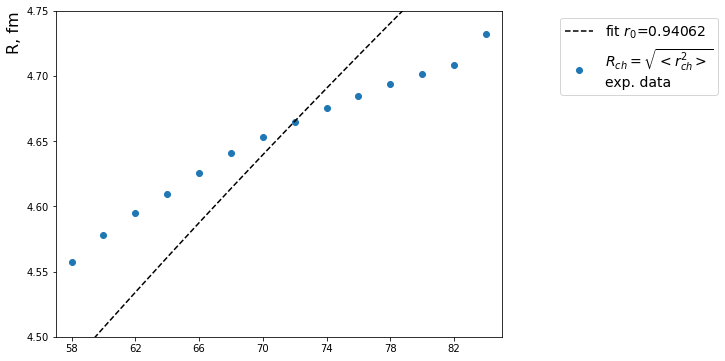

In [68]:
Sn_result_exp_comps = Sn_result_exp.eval_components()


percent_diff_Sn = (R_ch_data_Sn['R_ch_exp'].values - Sn_result_exp_comps['radius_line']) / R_ch_data_Sn['R_ch_exp'].values
percent_diff_Sn = percent_diff_Sn*100

fig = plt.figure(figsize=(8,6))
# set height ratios for sublots
#plt.plot(N, R, color='blue', label='$R_A=1.0A^{1/3}fm$')
#plt.plot(N, ((A/65)**(1/3)), color='green', )
#plt.plot(N, R_1, color='red', label='$R_A=1.2A^{1/3}fm$')
#plt.plot(N, R_2, color='black', label='$R_A=1.5A^{1/3}fm$')
plt.scatter(R_ch_data_Sn['N'].values, R_ch_data_Sn['R_ch_exp'].values, label='$R_{ch}=\sqrt{<r_{ch}^{2}>}$ \nexp. data')
plt.plot(R_ch_data_Sn['N'].values, Sn_result_exp_comps['radius_line'], 'k', ls='--', label='fit $r_0$={:.5}'.format(Sn_result_exp.best_values['r0']))

plt.xlim(R_ch_data_Sn['N'].values.min()-1, R_ch_data_Sn['N'].values.max()+1)
plt.ylim(4.5,4.75)
plt.xticks(np.arange(R_ch_data_Sn['N'].values.min(), R_ch_data_Sn['N'].values.max()+1,4),)
#plt.yticks(fontsize=14)
plt.ylabel('R, fm', loc='top', fontsize=16)
#ax0.set_title('Z=19 K', fontsize=16)
plt.legend(fontsize=14, loc='upper right', bbox_to_anchor=(1.5, 1.0))


#fig.savefig('radius_Z=19_K.png', bbox_inches="tight", format='png', dpi=500)
plt.show()

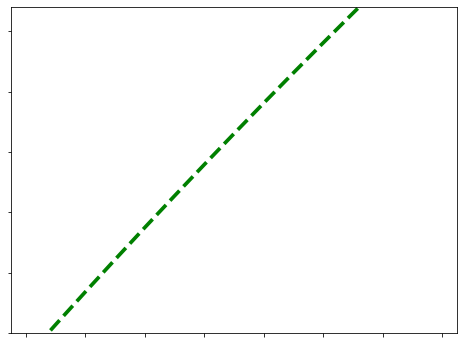

In [70]:
Sn_result_exp_comps = Sn_result_exp.eval_components()


percent_diff_Sn = (R_ch_data_Sn['R_ch_exp'].values - Sn_result_exp_comps['radius_line']) / R_ch_data_Sn['R_ch_exp'].values
percent_diff_Sn = percent_diff_Sn*100

fig = plt.figure(figsize=(8,6))
# set height ratios for sublots
#plt.plot(N, R, color='blue', label='$R_A=1.0A^{1/3}fm$')
#plt.plot(N, ((A/65)**(1/3)), color='green', )
#plt.plot(N, R_1, color='red', label='$R_A=1.2A^{1/3}fm$')
#plt.plot(N, R_2, color='black', label='$R_A=1.5A^{1/3}fm$')
#plt.scatter(R_ch_data_Sn['N'].values, R_ch_data_Sn['R_ch_exp'].values, label='$R_{ch}=\sqrt{<r_{ch}^{2}>}$ \nexp. data')
plt.plot(R_ch_data_Sn['N'].values, Sn_result_exp_comps['radius_line'], 'green', linewidth=3.7, ls='--', label='fit $r_0$={:.5}'.format(Sn_result_exp.best_values['r0']))

plt.xlim(R_ch_data_Sn['N'].values.min()-1, R_ch_data_Sn['N'].values.max()+3)
plt.ylim(4.5,4.77)
plt.xticks(np.arange(R_ch_data_Sn['N'].values.min(), R_ch_data_Sn['N'].values.max()+3,4),)
plt.tick_params(
    axis='both',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=True,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False, labelleft=False) # labels along the bottom edge are off
#plt.yticks(fontsize=14)
#plt.ylabel('R, fm', loc='top', fontsize=16)
#ax0.set_title('Z=19 K', fontsize=16)
#plt.legend(fontsize=14, loc='upper right', bbox_to_anchor=(1.5, 1.0))
#plt.axis('off')
#fig.savefig('radius_Sn.png', format='png', dpi=500, transparent=True)
plt.show()

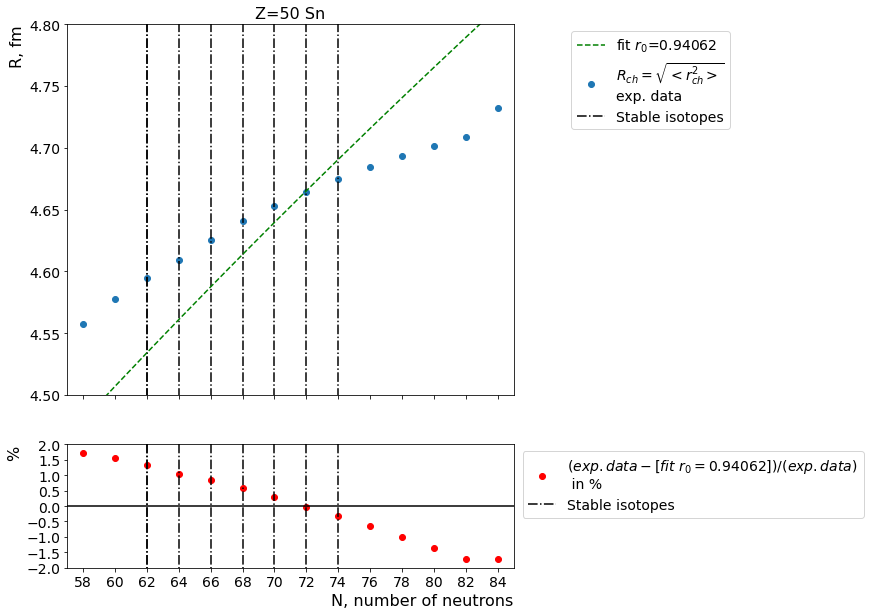

In [101]:


percent_diff_Sn = (R_ch_data_Sn['R_ch_exp'].values - Sn_result_exp_comps['radius_line']) / R_ch_data_Sn['R_ch_exp'].values
percent_diff_Sn = percent_diff_Sn*100

fig = plt.figure(figsize=(8,10))
# set height ratios for sublots
gs = gridspec.GridSpec(2, 1, height_ratios=[3, 1]) 

# the fisrt subplot
ax0 = plt.subplot(gs[0])
#ax0.plot(N, R, color='blue', label='$R_A=1.0A^{1/3}fm$')
#plt.plot(N, ((A/65)**(1/3)), color='green', )
#ax0.plot(N, R_1, color='red', label='$R_A=1.2A^{1/3}fm$')
#plt.plot(N, R_2, color='black', label='$R_A=1.5A^{1/3}fm$')
ax0.scatter(R_ch_data_Sn['N'].values, R_ch_data_Sn['R_ch_exp'].values, label='$R_{ch}=\sqrt{<r_{ch}^{2}>}$ \nexp. data')
ax0.plot(R_ch_data_Sn['N'].values, Sn_result_exp_comps['radius_line'], 'green', ls='--', label='fit $r_0$={:.5}'.format(Sn_result_exp.best_values['r0']))

ax0.vlines(x=62, ymin=-5, ymax=5.1, color='k', ls='-.', label = 'Stable isotopes')
for i in [62, 64, 66, 68, 70, 72, 74]:
    ax0.vlines(x=i, ymin=-5, ymax=4.8, color='k', ls='-.')


ax0.set_xlim(R_ch_data_Sn['N'].values.min()-1, R_ch_data_Sn['N'].values.max()+1)
ax0.set_ylim(4.5,4.8)
ax0.set_xticks(np.arange(R_ch_data_Sn['N'].values.min(), R_ch_data_Sn['N'].values.max()+2,2),)
#plt.yticks(fontsize=14)
ax0.set_ylabel('R, fm', loc='top', fontsize=16)
ax0.set_title('Z=50 Sn', fontsize=16)
ax0.legend(fontsize=14, loc='upper right', bbox_to_anchor=(1.5, 1.0))

ax0.tick_params(axis='both', which='major', labelsize=14)
ax0.tick_params(axis='both', which='minor', labelsize=14)

ax1 = plt.subplot(gs[1], sharex = ax0)
label_ax1 = '$(exp. data - [fit~r_0={:.5}])/(exp. data)$'.format(Sn_result_exp.best_values['r0'])
ax1.scatter(R_ch_data_Sn['N'].values, percent_diff_Sn, c = 'red', label = label_ax1 + '\n in %')
ax1.tick_params(axis='both', which='major', labelsize=14)
ax1.tick_params(axis='both', which='minor', labelsize=14)
ax1.set_xlabel('N, number of neutrons', loc='right', fontsize=16)


ax1.vlines(x=62, ymin=-5, ymax=5.1, color='k', ls='-.', label = 'Stable isotopes')
for i in [62, 64, 66, 68, 70, 72, 74]:
    ax1.vlines(x=i, ymin=-5, ymax=4.8, color='k', ls='-.')

ax1.hlines(0, 0, 100, color='k')
ax1.set_ylim(-2, 2)
ax1.set_yticks(np.arange(-2,2.5,0.5))
ax1.set_ylabel('%', loc='top', fontsize=16)
#ax1.text(x=24, y=4, s='(max, min) = ({:.3}%, {:.3}%)'.format(percent_diff_K.max(), percent_diff_K.min()), fontsize=16)
ax1.legend(fontsize=14, loc='upper right', bbox_to_anchor=(1.8, 1.0))

plt.setp(ax0.get_xticklabels(), visible=False)
#fig.savefig('radius_Z=50_Sn.png', bbox_inches="tight", format='png', dpi=500)
plt.show()

In [98]:
Sn_table = pd.DataFrame({'N, number of neutrons':R_ch_data_Sn['N'].values, '%':percent_diff_Sn, 
                         'Stable':['Yes' if x in [62, 64, 66, 68, 70, 72, 74] else 'No' for x in R_ch_data_Sn['N'].values]})
Sn_table.head()

,"N, number of neutrons",%,Stable
0,58.0,1.713812,No
1,60.0,1.549533,No
2,62.0,1.321264,Yes
3,64.0,1.049761,Yes
4,66.0,0.828195,Yes


In [100]:
Sn_table.to_excel('Sn_percent_table.xls', index=False)